# Import library

In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.express as px

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

<a id = 'ref2'></a> 
<h2>Data Dictionary </h2>
<ol>
<li>Cement-- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Blast Furnace Slag -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Fly Ash  -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Water -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Superplasticizer -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Coarse Aggregate -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Fine Aggregate  -- quantitative -- kg in a m3 mixture -- Input Variable</li>
<li>Age -- quantitative -- Day (1~365) -- Input Variable</li>
<li>Concrete compressive strength -- quantitative -- MPa -- Output Variable</li>
</ol>

In [17]:
data = pd.read_csv(r"C:\Users\rakes\Documents\Raq files\Data Science\Data sets\concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<a id = "ref3"></a>
<h2>Discriptive statistics about data</h2>

In [27]:
# Understanding the basic ground information of my data
def all_about_my_data(data):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",data.shape[0])
    print("Number of Features:",data.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(data.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(data.isna().sum())

all_about_my_data(data)

Here is some Basic Ground Info about your Data:

Number of Instances: 1030
Number of Features: 9

Summary Stats:
            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980

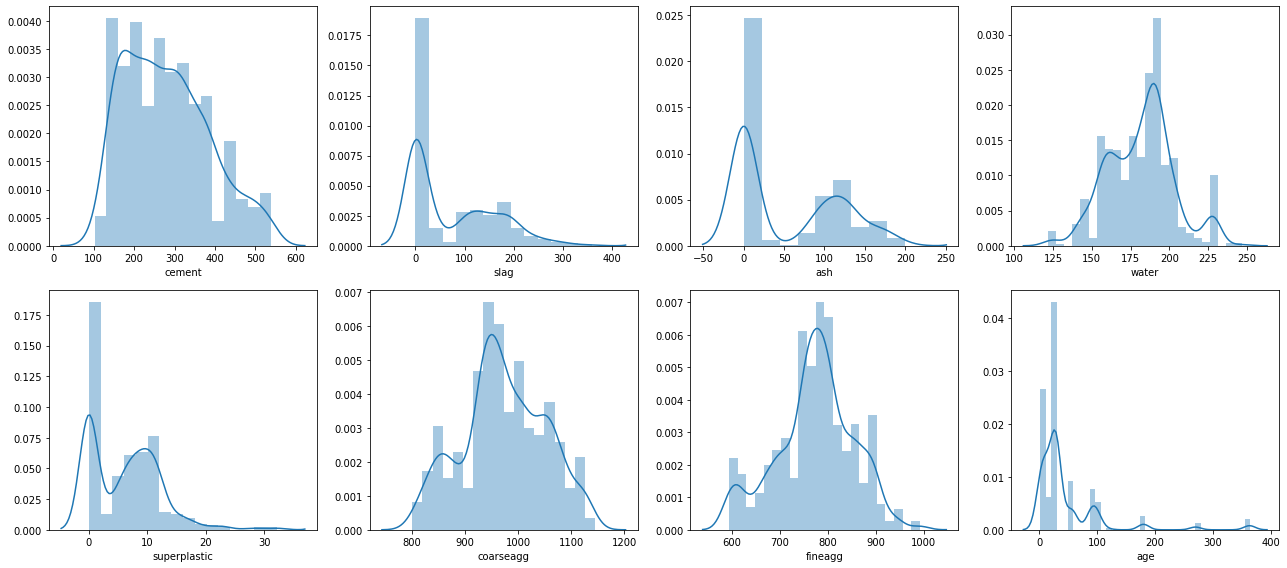

In [105]:
rows = 2 
columns = 4
col = data.columns
index = 0 
fig, ax = plt.subplots(nrows= rows, ncols= columns, figsize = (18,8))

for i in range(rows):
    for j in range(columns):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

<a id = "ref4"></a>
<h2>Univariate, Bivariate, multivariate analysis</h2>

In [98]:
class Analysis:
    
    def __init__(self):
        print("univariate object created")
        
    @staticmethod   
    def Histogram(x= None, y=None):
        fig = px.histogram(x=x)
        fig.show()
        
    @staticmethod    
    def scatterplot(x= None, y=None):
        fig = px.scatter(x=x, y=y)
        fig.show()
        
    @staticmethod
    def Heatmap(data= None):
        corelation = data.corr()
        plt.figure(figsize = (20,20))
        sns.heatmap(corelation, annot = True, cmap="BrBG")
        plt.show()
        
    @staticmethod
    def Jointplot(x= None, y= None):
        plt.figure(figsize = (20,20))    
        sns.jointplot(x=x, y=y, height=10, ratio=3, color="lime")
        plt.show()
    

In [99]:
v1 = Analysis()

univariate object created


In [89]:
v1.Histogram(x=data['strength'])

In [82]:
v1.scatterplot(x= data['cement'], y= data['strength'])

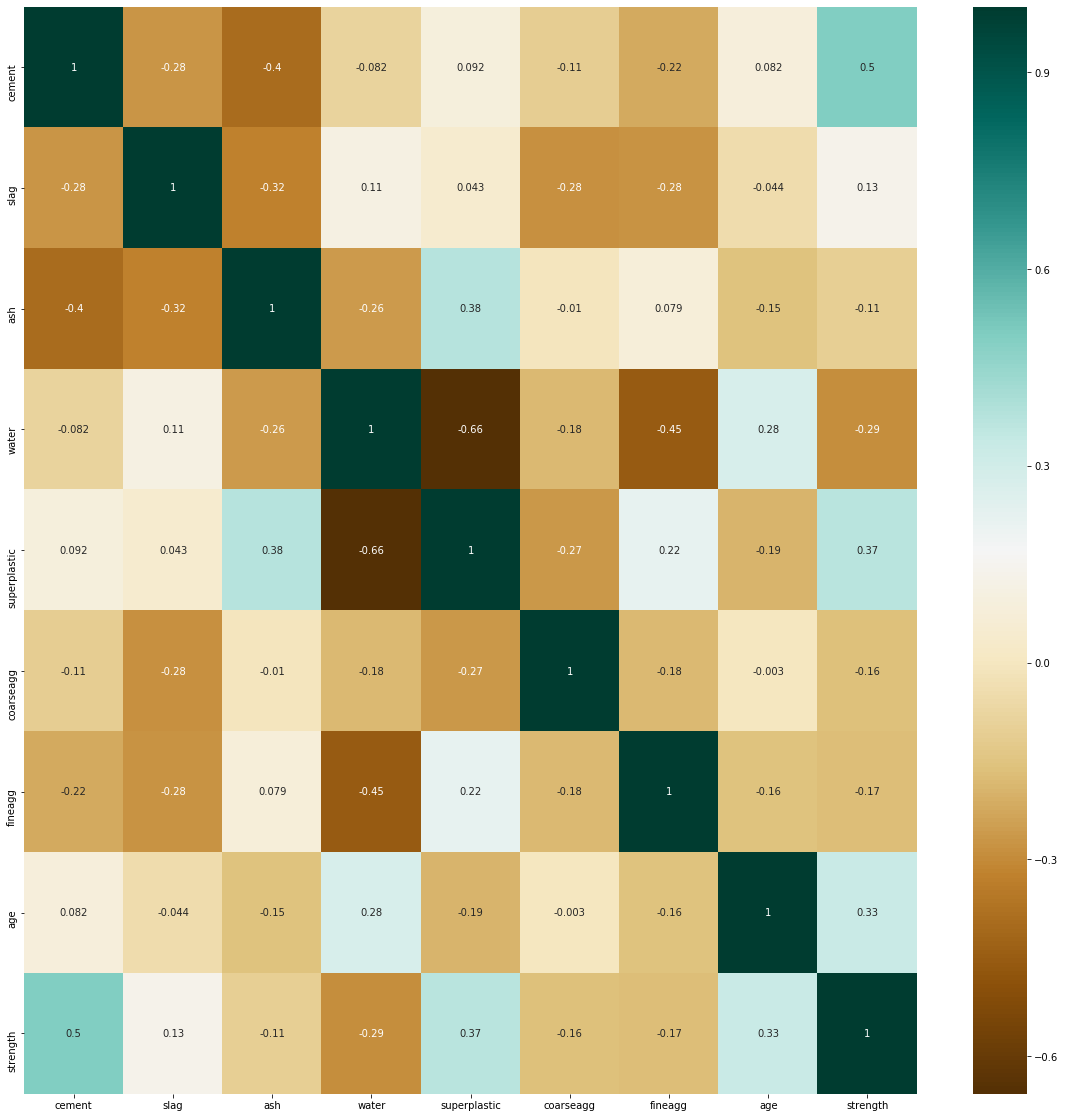

In [97]:
v1.Heatmap(data=data)

<Figure size 1440x1440 with 0 Axes>

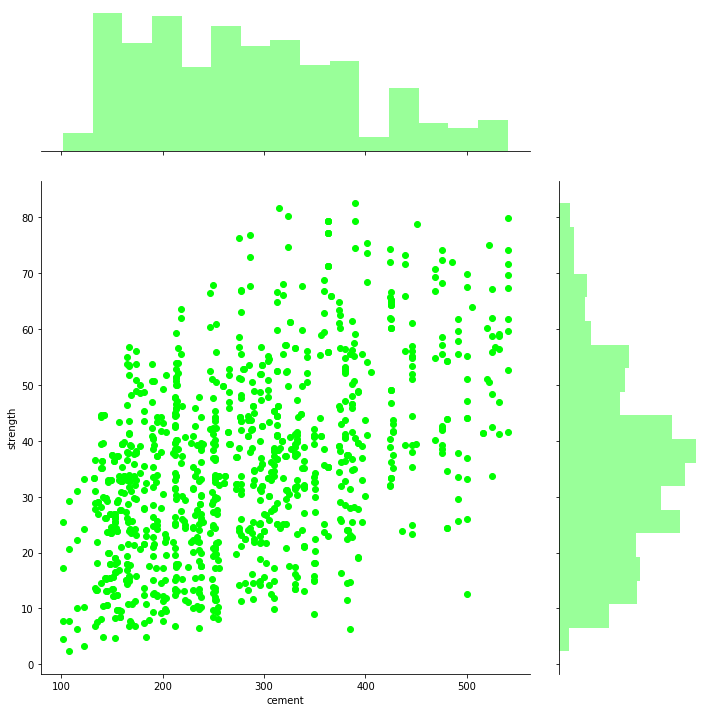

In [100]:
v1.Jointplot(x=data['cement'], y=data['strength'])

In [108]:
X = data.iloc[:,:8]
y = data.iloc[:,8:]

In [109]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [110]:
y.head()

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29


<a id = "ref5"></a>
<h2>Model Building</h2>

In [125]:
def linearmodel(X, y):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 9)
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Intercept',reg.intercept_)
    print("R2_score : ", r2_score(y_test, y_pred))
    print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
    
    importance = reg.coef_[0]
    # summarize feature importance
    for i,j in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,j))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
    

Intercept [-18.27859757]
R2_score :  0.6299972335030755
mean_squared_error :  105.81697802031906
Feature: 0, Score: 0.11783
Feature: 1, Score: 0.10296
Feature: 2, Score: 0.08647
Feature: 3, Score: -0.15012
Feature: 4, Score: 0.33327
Feature: 5, Score: 0.01617
Feature: 6, Score: 0.01725
Feature: 7, Score: 0.10930


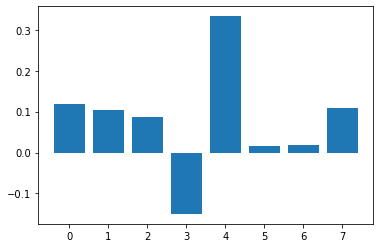

In [126]:
linearmodel(X,y)

In [127]:
from sklearn.preprocessing import Normalizer

data_n = Normalizer().fit_transform(data)
data_n = pd.DataFrame(data_n)

In [128]:
X_n = data_n.iloc[:,:8]
y_n = data_n.iloc[:,8:]

Intercept [-588.88038146]
R2_score :  0.6459038199761218
mean_squared_error :  101.26785822012795
Feature: 0, Score: 295.27080
Feature: 1, Score: 176.87272
Feature: 2, Score: 128.04392
Feature: 3, Score: -204.35622
Feature: 4, Score: 313.43196
Feature: 5, Score: 466.95945
Feature: 6, Score: 366.73037
Feature: 7, Score: 216.76386


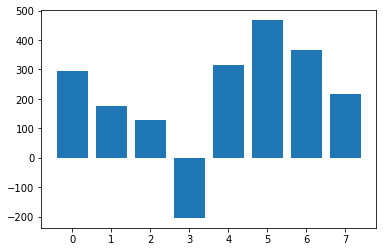

In [129]:
linearmodel(X_n, y)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(X)
data_std = pd.DataFrame(scaler)

In [131]:
X_std = data_std.iloc[:, :8]
y_std = data.iloc[:, 8:]

In [132]:
X_std.head()

,0,1,2,3,4,5,6,7
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


Intercept [36.01792345]
R2_score :  0.6299972335030755
mean_squared_error :  105.81697802031908
Feature: 0, Score: 12.30806
Feature: 1, Score: 8.87873
Feature: 2, Score: 5.53091
Feature: 3, Score: -3.20422
Feature: 4, Score: 1.98995
Feature: 5, Score: 1.25644
Feature: 6, Score: 1.38218
Feature: 7, Score: 6.90109


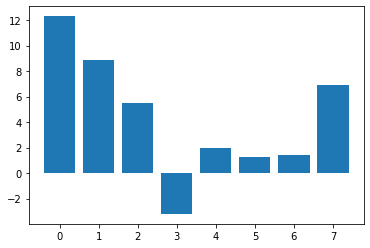

In [133]:
linearmodel(X_std,y)

In [134]:
#Feature Selection 
from sklearn.feature_selection import RFE

logreg = linear_model.LinearRegression()
rfe = RFE(logreg, 6)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False  True]
[1 1 1 1 1 3 2 1]


C:\Users\rakes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [135]:
d = rfe.support_

g = X.columns

a = g[d]

X_f = X[a]

Intercept [27.29155288]
R2_score :  0.6274628473222501
mean_squared_error :  106.54178634899849
Feature: 0, Score: 0.10545
Feature: 1, Score: 0.08779
Feature: 2, Score: 0.06998
Feature: 3, Score: -0.20900
Feature: 4, Score: 0.28685
Feature: 5, Score: 0.10871


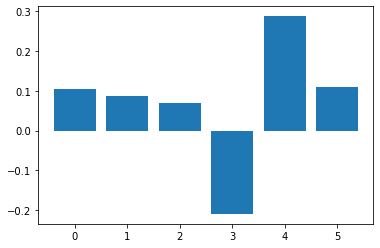

In [136]:
linearmodel(X_f,y)

In [70]:
#Multi-Collinearity
import numpy as np
X = np.array(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)
X = pd.DataFrame(X)

[15.229736835039063, 3.442254211877823, 4.155409480198613, 79.71718322439241, 5.426055391925735, 84.67589012649955, 72.23838841153335, 1.718995020540424]
